# Car Price Prediction Model

In [1]:
import warnings
warnings.filterwarnings('ignore')   # Supress Warnings

Import Packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set_style("darkgrid")

Read data from csv file

In [3]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars_data.shape

(205, 26)

In [6]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Cleaning the data

The variable CarName comprises two parts: the first word is the name of the car company, and the second is the car model. We only need car company name

In [8]:
# Let's only keep the car company names are remove the model names
cars_data['CarName'] = cars_data['CarName'].apply(lambda x: x.split()[0])

In [9]:
def rename_CarName(incorrect_name:str, correct_name:str):
    cars_data.loc[(cars_data["CarName"]==incorrect_name), "CarName"] = correct_name

In [10]:
# In some row car company names are inconsistent

rename_CarName("vw", "volkswagen")
rename_CarName("vokswagen", "volkswagen")
rename_CarName("toyouta", "toyota")
rename_CarName("maxda", "mazda")
rename_CarName("Nissan", "nissan")
rename_CarName("maxda", "mazda")

In [11]:
# Converting words to numbers

varlist = ["doornumber", "cylindernumber"]

num_dict = {
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12
}

# Applying the function to the data
cars_data[varlist] = cars_data[varlist].apply(lambda x: x.map(num_dict))

In [12]:
# Numerical Variables from the data set
numerical_variables = [
    "price",
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg"
]

In [13]:
# Categorical Variables from the data set
categorical_variables = [
    "symboling",
    "CarName",
    "fueltype",
    "aspiration",
    "doornumber",
    "carbody",
    "drivewheel",
    "enginelocation",
    "enginetype",
    "cylindernumber",
    "fuelsystem"
]

### Visualizing the Data

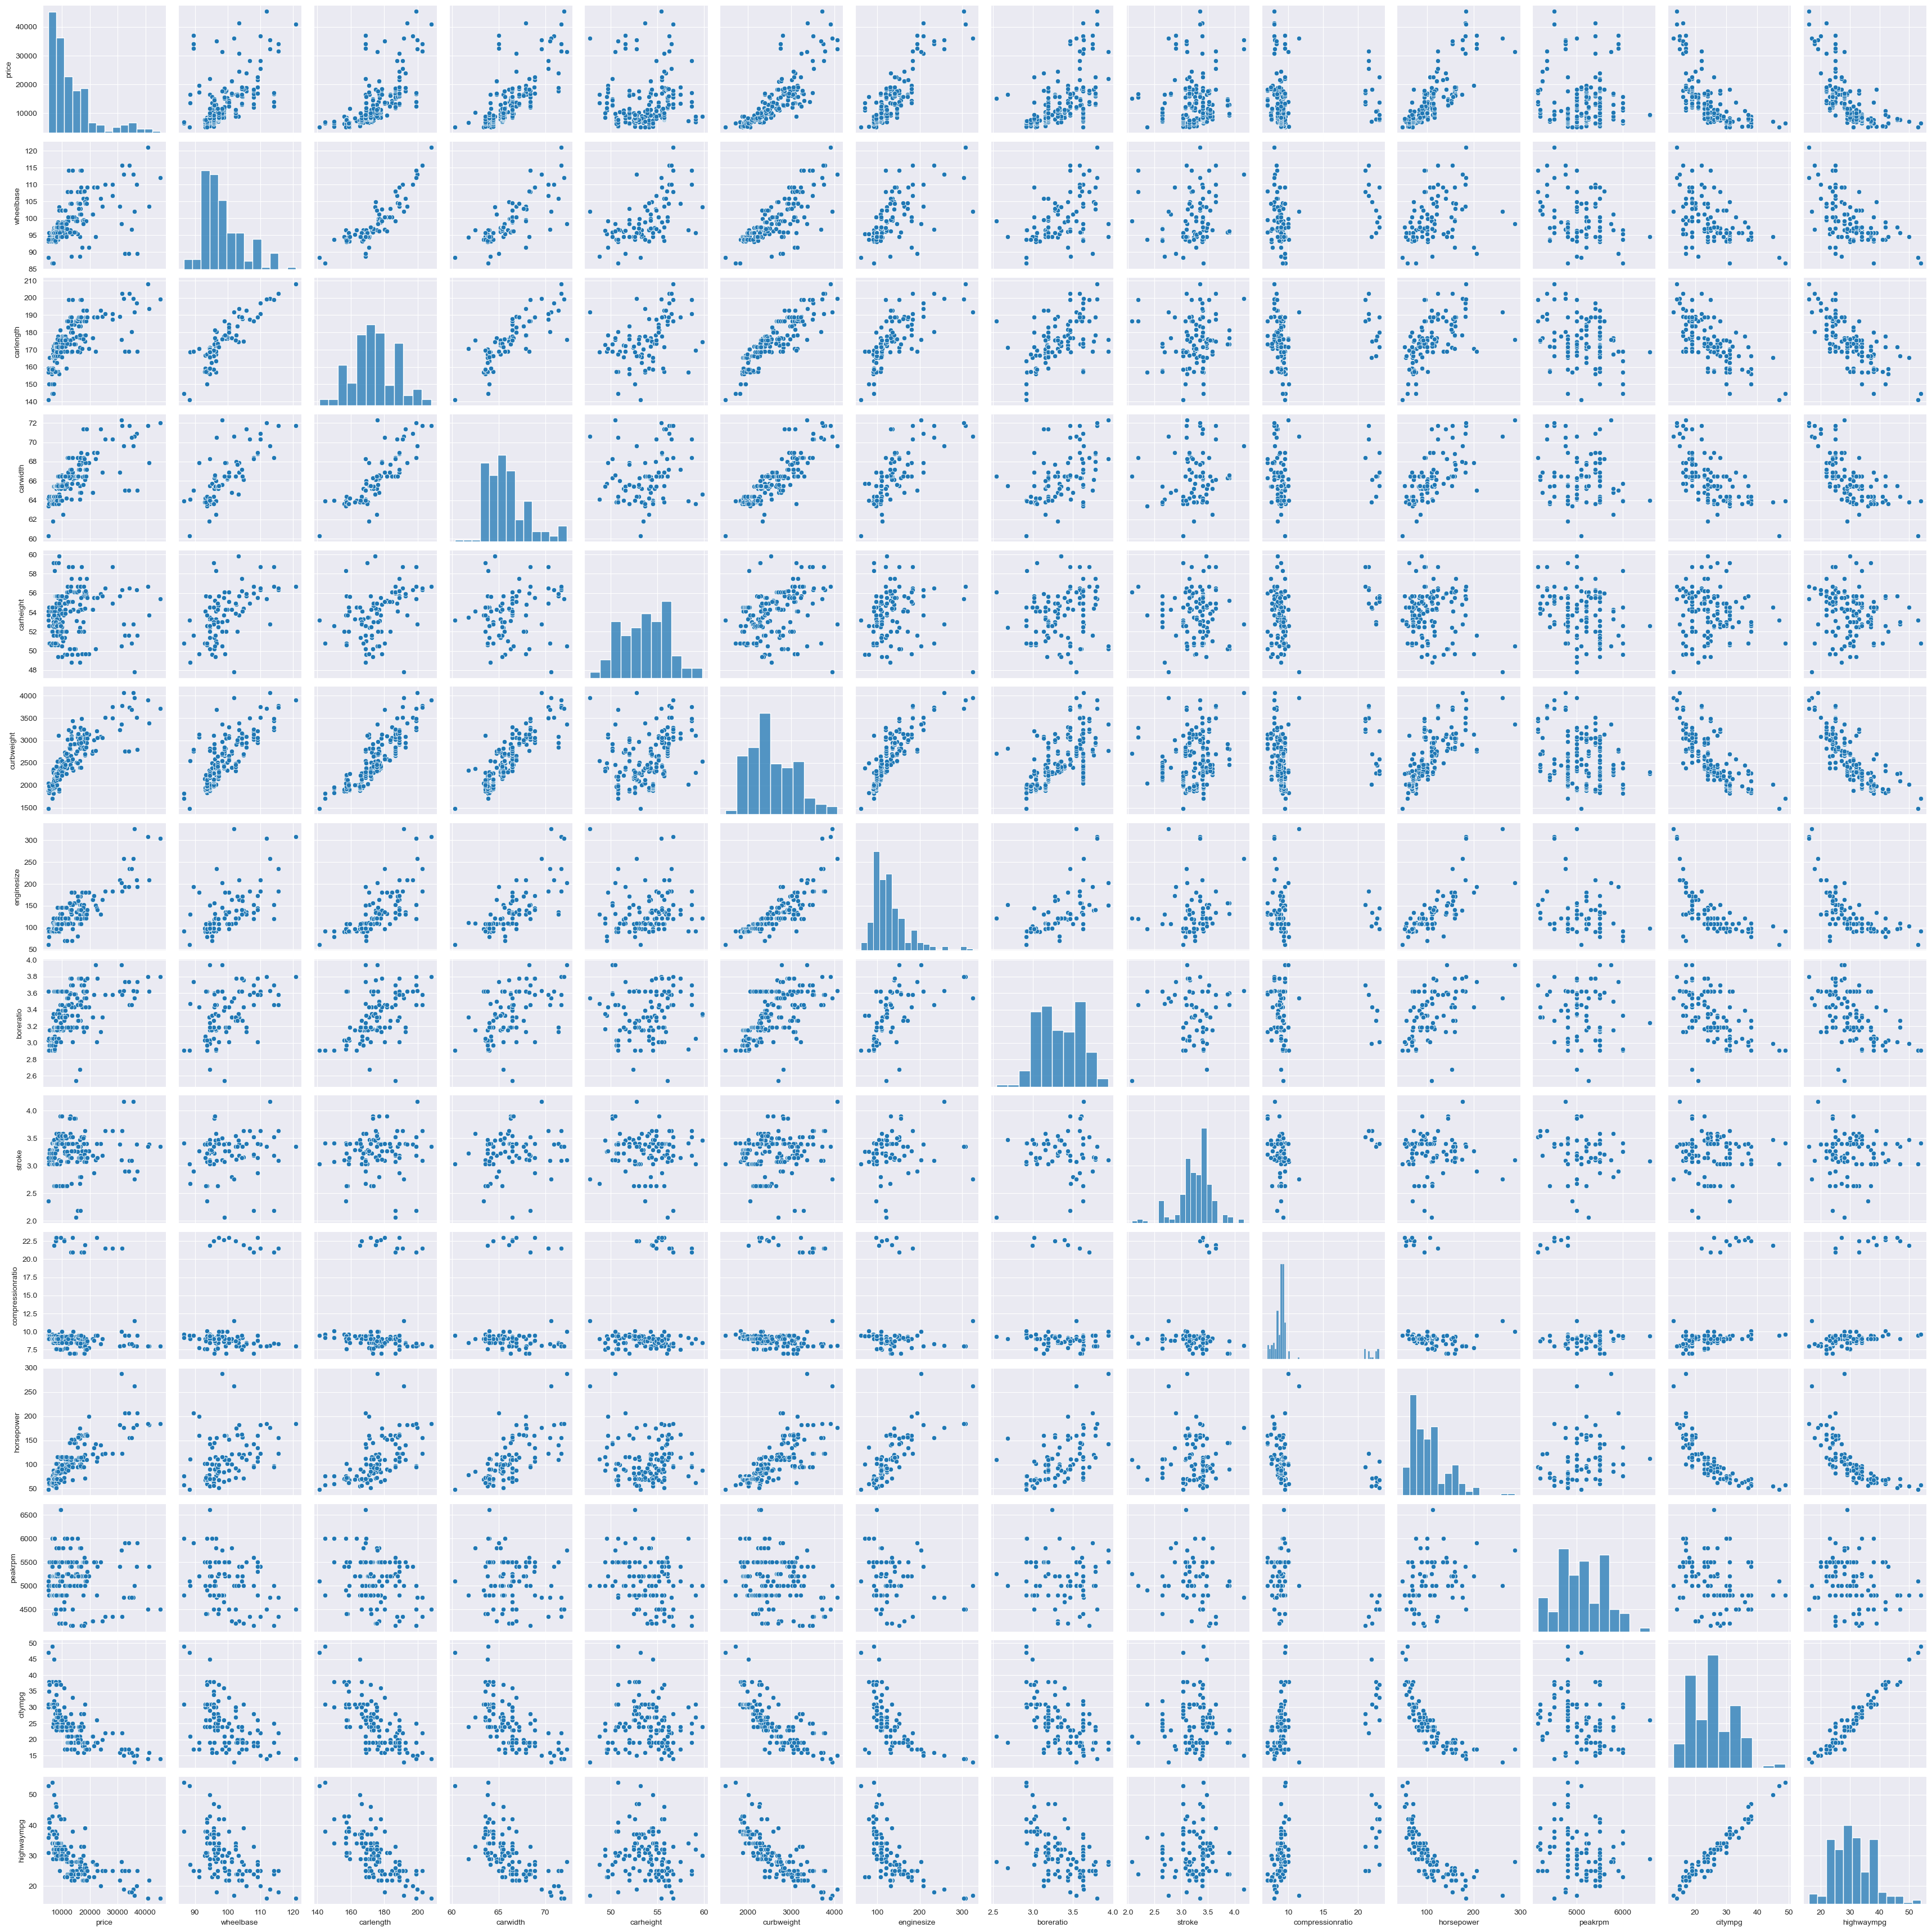

In [14]:
# Plotting all Numerical Variables
sns.pairplot(data=cars_data[numerical_variables])
plt.show()

From the pairplot we can see that:

- `Highway Mileage` and `City Mileage` decreses as the price increases.
- `Horsepower` increases linearly as price increases.
- `Engine Size` also inceases linearly with price.
- `Curb weight` also increases linearly with price.
- `Car width`, `Car Length` and `bore ratio` are somewhat linearly increasing with price.

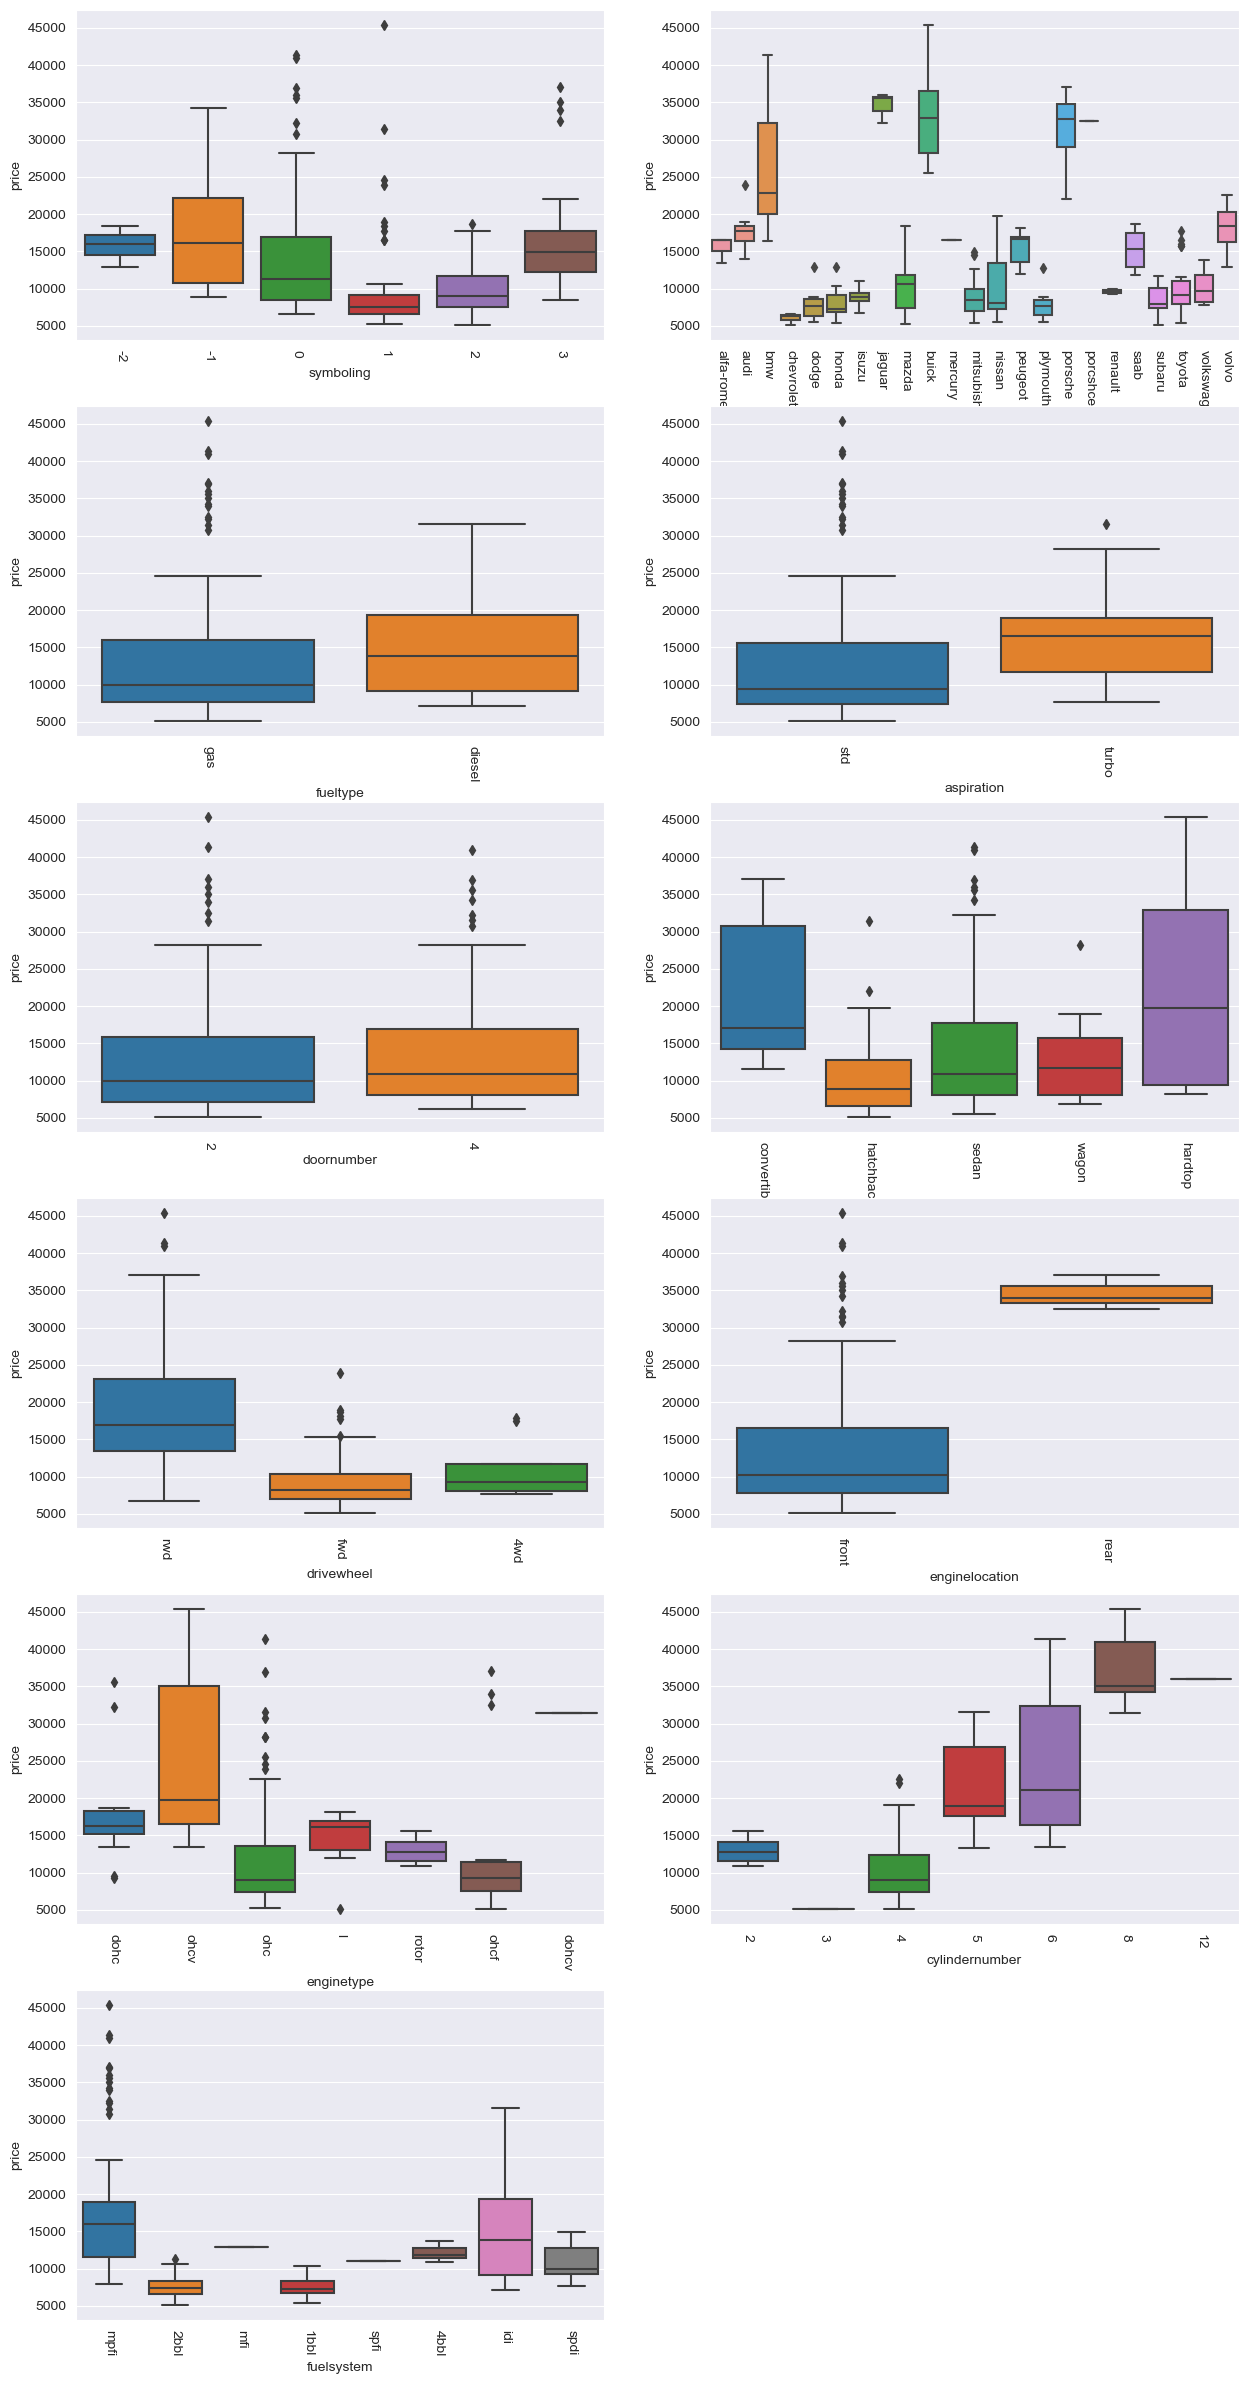

In [15]:
plt.figure(figsize=(15,30))

# Ploting Box plot for all categorical variables
for i, var in enumerate(categorical_variables):
    plt.subplot(6,2,i+1)
    sns.boxplot(x=var,y='price',data=cars_data)
    plt.xticks(rotation=-90)

plt.show()

From the Box Plot we can see:

- Price changes as the `Car company` changes
- Price increases if the car is `Turbo Charged` wrt `Standard`
- Price changes with `symboling`
- Price changes drastically if the Engine location is `Rear` instead of `Front`
- Price increases with the increase in `number of cylinder`

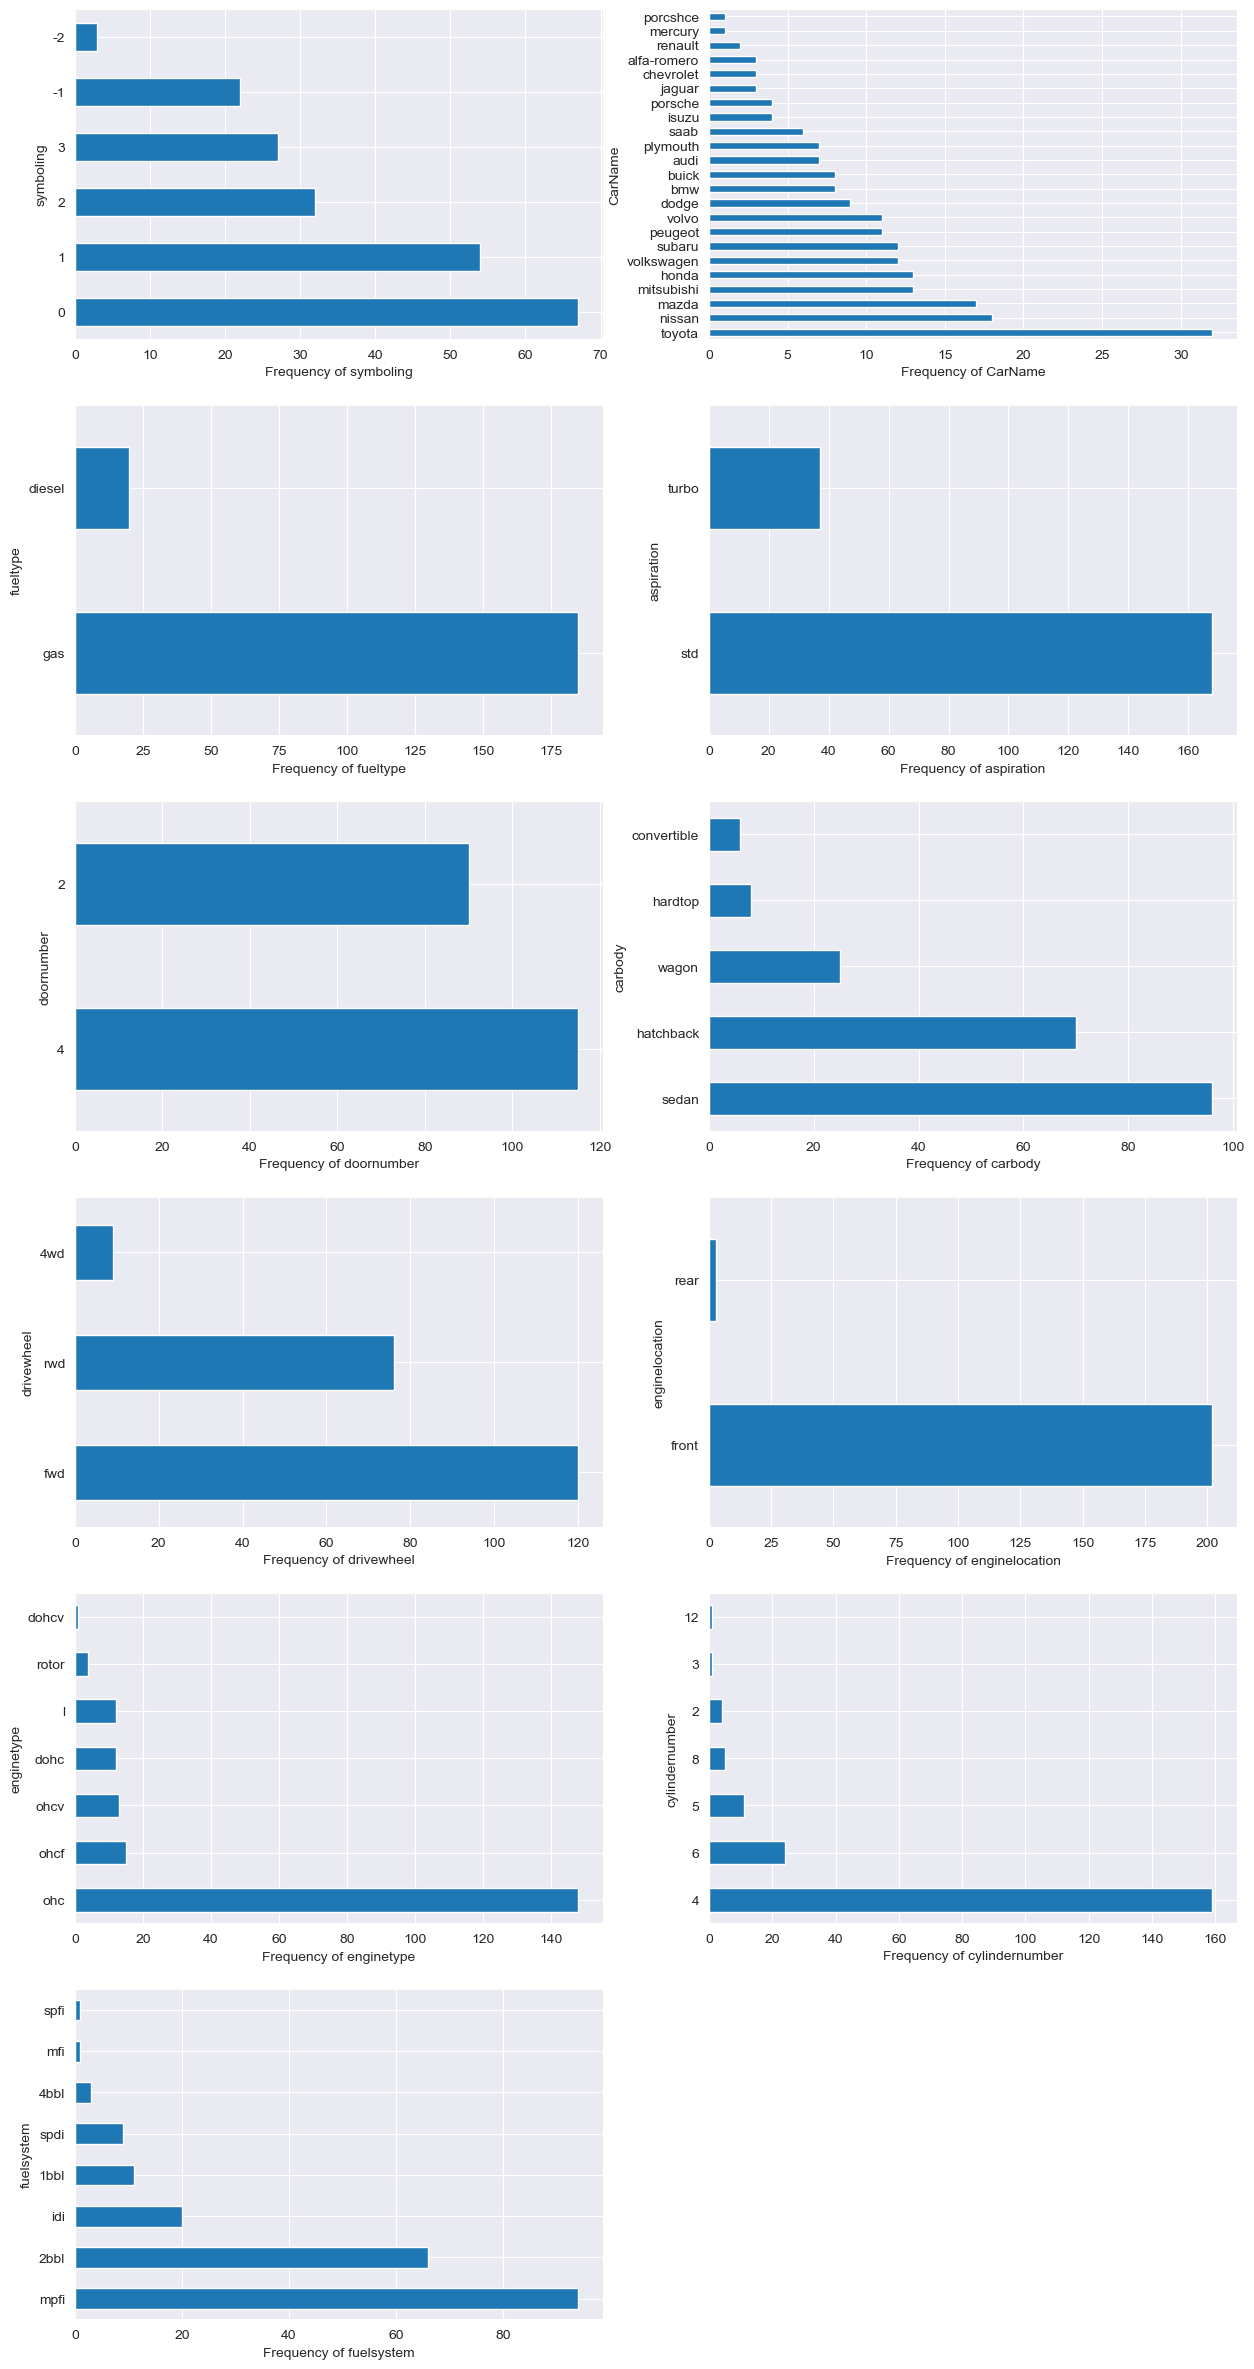

In [16]:
plt.figure(figsize=(15,30))

# Ploting frequency of categorical variables
for i, var in enumerate(categorical_variables):
    plt.subplot(6,2,i+1)
    bar = cars_data[var].value_counts().sort_values(ascending=False).plot(kind='barh')
    bar.set(ylabel=var, xlabel=f"Frequency of {var}")

plt.show()
    

- `Toyota`, `Nissan` and `Mazda` are some of the top car companies
- `ohc` engine type is the most used in the cars
- `mpfi` and `2bbl` are the most used fuel system in the cars
- Most of the cars have `4` cylinders
- Most of the cars are `Sedan` and `Hatchback`

We can see:
- 

In [17]:
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,4,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Converting Categorical Variables to Categorical Numerical Variables

### Dummy Variable

In [18]:
def create_dummy(var, df):
    dummy = pd.get_dummies(df[var], drop_first=True)
    df = pd.concat([df, dummy], axis=1)
    return df

In [19]:
ignore_lst = ["symboling", "doornumber", "cylindernumber"]
varlist = [e for e in categorical_variables if e not in ignore_lst]

for var in varlist:
   cars_data = create_dummy(var, cars_data)
   cars_data.drop([var], axis=1, inplace=True)

### Creating the Model

Spliting the data into training and testing group

In [20]:
df_train, df_test = train_test_split(cars_data, train_size=0.7, test_size=0.3, random_state=100)

Scaling the data for comparable scales

In [21]:
scaler = MinMaxScaler()

In [22]:
# Apply scaler to all the required variables
scale_vars = [
    "price",
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "symboling",
    "doornumber",
    "cylindernumber",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg"
]

df_train[scale_vars] = scaler.fit_transform(df_train[scale_vars])

### Building the Model

In [23]:
y_train = df_train.pop('price')
X_train = df_train

In [24]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

In [25]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('car_ID', False, 47),
 ('symboling', False, 48),
 ('doornumber', False, 43),
 ('wheelbase', False, 9),
 ('carlength', True, 1),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('curbweight', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 6),
 ('horsepower', False, 18),
 ('peakrpm', False, 4),
 ('citympg', False, 11),
 ('highwaympg', False, 31),
 ('audi', False, 33),
 ('bmw', True, 1),
 ('buick', False, 40),
 ('chevrolet', False, 27),
 ('dodge', False, 24),
 ('honda', False, 28),
 ('isuzu', False, 35),
 ('jaguar', False, 29),
 ('mazda', False, 37),
 ('mercury', False, 50),
 ('mitsubishi', False, 21),
 ('nissan', False, 34),
 ('peugeot', False, 2),
 ('plymouth', False, 25),
 ('porcshce', False, 49),
 ('porsche', True, 1),
 ('renault', False, 30),
 ('saab', False, 10),
 ('subaru', False, 16),
 ('toyota', False, 36),
 ('volkswagen', False, 32),
 ('volvo', False, 45),
 ('gas', False, 5),
 ('

In [26]:
# Variables selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'bmw', 'porsche', 'rear'],
      dtype='object')

In [27]:
# Variables rejected by RFE
X_train.columns[~rfe.support_]

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carheight',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'audi', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar',
       'mazda', 'mercury', 'mitsubishi', 'nissan', 'peugeot', 'plymouth',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [28]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [29]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [30]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [31]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     143.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           6.56e-66
Time:                        22:10:11   Log-Likelihood:                 194.04
No. Observations:                 143   AIC:                            -366.1
Df Residuals:                     132   BIC:                            -333.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1400      0.064      2.191      0.030       0.014       0.266
carlength         -0.1968      0.072     -2.730      0.007      -0.339      -0.054
carwidth           0.5057      0.075      6.772      0.000       0.358       0.653
curbweight         0.3674      0.092      3.984      0.000       0.185       0.550
cylindernumber    -0.8245      0.198     -4.173      0.000      -1.215      -0.434
enginesize         1.1967      0.213      5.621      0.000       0.776       1.618
boreratio         -0.3291      0.070     -4.694      0.000      -0.468      -0.190
stroke            -0.2694      0.063     -4.277      0.000      -0.394      -0.145
bmw                0.2694      0.029      9.270      0.000       0.212       0.327
porsche            0.1693      0.060      2.830      0.005       0.051       0.288
rear               0.3021      0.089      3.394      0.001       0.126       0.478
==============================================================================
Omnibus:                       10.197   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               11.421
Skew:                           0.504   Prob(JB):                      0.00331
Kurtosis:                       3.950   Cond. No.                         87.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are in acceptable range

In [32]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,138.92
5,enginesize,36.60
4,cylindernumber,17.69
3,curbweight,12.82
1,carlength,7.36
6,boreratio,7.12
2,carwidth,6.41
7,stroke,3.34
9,porsche,2.50
10,rear,1.87


We can drop enginesize variable

In [33]:
X = X.drop('enginesize', axis=1)

In [34]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [35]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     127.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           7.33e-61
Time:                        22:10:11   Log-Likelihood:                 178.70
No. Observations:                 143   AIC:                            -337.4
Df Residuals:                     133   BIC:                            -307.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1679      0.037     -4.598      0.000      -0.240      -0.096
carlength         -0.2792      0.078     -3.568      0.001      -0.434      -0.124
carwidth           0.4475      0.082      5.456      0.000       0.285       0.610
curbweight         0.6634      0.084      7.901      0.000       0.497       0.829
cylindernumber     0.2099      0.080      2.630      0.010       0.052       0.368
boreratio         -0.0221      0.049     -0.454      0.651      -0.119       0.074
stroke             0.0014      0.045      0.031      0.975      -0.088       0.090
bmw                0.2853      0.032      8.894      0.000       0.222       0.349
porsche            0.0630      0.063      1.001      0.319      -0.062       0.188
rear               0.4624      0.094      4.944      0.000       0.277       0.647
==============================================================================
Omnibus:                       17.019   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.541
Skew:                           0.594   Prob(JB):                     1.05e-06
Kurtosis:                       4.792   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

stroke variable has very high P value, we can drop it

R squared has dropped to 0.896

In [36]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,36.86
3,curbweight,8.64
1,carlength,7.06
2,carwidth,6.29
5,boreratio,2.80
4,cylindernumber,2.35
8,porsche,2.25
9,rear,1.68
6,stroke,1.38
7,bmw,1.14


In [37]:
X = X.drop('stroke', axis=1)

In [38]:
# Build a thrid fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [39]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     144.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.90e-62
Time:                        22:10:11   Log-Likelihood:                 178.70
No. Observations:                 143   AIC:                            -339.4
Df Residuals:                     134   BIC:                            -312.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1670      0.024     -7.059      0.000      -0.214      -0.120
carlength         -0.2794      0.078     -3.589      0.000      -0.433      -0.125
carwidth           0.4479      0.081      5.562      0.000       0.289       0.607
curbweight         0.6641      0.081      8.210      0.000       0.504       0.824
cylindernumber     0.2091      0.075      2.770      0.006       0.060       0.358
boreratio         -0.0228      0.044     -0.520      0.604      -0.110       0.064
bmw                0.2853      0.032      8.929      0.000       0.222       0.348
porsche            0.0631      0.063      1.006      0.316      -0.061       0.187
rear               0.4624      0.093      4.963      0.000       0.278       0.647
==============================================================================
Omnibus:                       17.067   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.710
Skew:                           0.594   Prob(JB):                     9.61e-07
Kurtosis:                       4.799   Cond. No.                         28.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

boreration variable has high P value

In [40]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,15.60
3,curbweight,8.08
1,carlength,7.03
2,carwidth,6.11
5,boreratio,2.28
7,porsche,2.25
4,cylindernumber,2.12
8,rear,1.68
6,bmw,1.14


In [41]:
X = X.drop('boreratio', axis=1)

# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     165.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.05e-63
Time:                        22:10:11   Log-Likelihood:                 178.55
No. Observations:                 143   AIC:                            -341.1
Df Residuals:                     135   BIC:                            -317.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1729      0.021     -8.338      0.000      -0.214      -0.132
carlength         -0.2885      0.076     -3.817      0.000      -0.438      -0.139
carwidth           0.4504      0.080      5.616      0.000       0.292       0.609
curbweight         0.6528      0.078      8.399      0.000       0.499       0.807
cylindernumber     0.2220      0.071      3.120      0.002       0.081       0.363
bmw                0.2843      0.032      8.938      0.000       0.221       0.347
porsche            0.0506      0.058      0.876      0.383      -0.064       0.165
rear               0.4652      0.093      5.015      0.000       0.282       0.649
==============================================================================
Omnibus:                       16.668   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.033
Skew:                           0.597   Prob(JB):                     2.22e-06
Kurtosis:                       4.715   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

porche has higher P value

In [42]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,12.05
3,curbweight,7.50
1,carlength,6.67
2,carwidth,6.09
6,porsche,1.92
4,cylindernumber,1.89
7,rear,1.67
5,bmw,1.14


In [43]:
X = X.drop('porsche', axis=1)

# Build a fifth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     193.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           5.08e-64
Time:                        22:10:12   Log-Likelihood:                 178.15
No. Observations:                 143   AIC:                            -342.3
Df Residuals:                     136   BIC:                            -321.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1734      0.021     -8.373      0.000      -0.214      -0.132
carlength         -0.3124      0.070     -4.435      0.000      -0.452      -0.173
carwidth           0.4783      0.074      6.504      0.000       0.333       0.624
curbweight         0.6552      0.078      8.441      0.000       0.502       0.809
cylindernumber     0.2215      0.071      3.116      0.002       0.081       0.362
bmw                0.2859      0.032      9.010      0.000       0.223       0.349
rear               0.5152      0.073      7.052      0.000       0.371       0.660
==============================================================================
Omnibus:                       16.190   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.647
Skew:                           0.591   Prob(JB):                     4.45e-06
Kurtosis:                       4.655   Cond. No.                         22.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P values are in acceptable range

In [44]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,12.04
3,curbweight,7.49
1,carlength,5.80
2,carwidth,5.13
4,cylindernumber,1.89
5,bmw,1.14
6,rear,1.04


curbweight has high VIF, we can drop it

In [45]:
X = X.drop('curbweight', axis=1)

# Build a sixth fitted model
X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()

lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           9.80e-53
Time:                        22:10:12   Log-Likelihood:                 148.03
No. Observations:                 143   AIC:                            -284.1
Df Residuals:                     137   BIC:                            -266.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2616      0.022    -11.897      0.000      -0.305      -0.218
carlength          0.0387      0.070      0.553      0.581      -0.100       0.177
carwidth           0.7204      0.083      8.650      0.000       0.556       0.885
cylindernumber     0.4666      0.080      5.847      0.000       0.309       0.624
bmw                0.2808      0.039      7.197      0.000       0.204       0.358
rear               0.5740      0.089      6.418      0.000       0.397       0.751
==============================================================================
Omnibus:                       32.855   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.122
Skew:                           1.091   Prob(JB):                     6.51e-13
Kurtosis:                       5.158   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,const,8.97
2,carwidth,4.35
1,carlength,3.78
3,cylindernumber,1.57
4,bmw,1.14
5,rear,1.03


In [47]:
X = X.drop('carlength', axis=1)

# Build a seventh fitted model
X_train_lm = sm.add_constant(X)

lr_7 = sm.OLS(y_train, X_train_lm).fit()

lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     180.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           7.95e-54
Time:                        22:10:12   Log-Likelihood:                 147.87
No. Observations:                 143   AIC:                            -285.7
Df Residuals:                     138   BIC:                            -270.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2577      0.021    -12.409      0.000      -0.299      -0.217
carwidth           0.7579      0.048     15.736      0.000       0.663       0.853
cylindernumber     0.4618      0.079      5.836      0.000       0.305       0.618
bmw                0.2864      0.038      7.609      0.000       0.212       0.361
rear               0.5748      0.089      6.444      0.000       0.398       0.751
==============================================================================
Omnibus:                       34.139   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.348
Skew:                           1.114   Prob(JB):                     7.86e-14
Kurtosis:                       5.273   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
X = X.drop('const', axis=1)

vif = pd.DataFrame()
# X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
1,cylindernumber,7.58
0,carwidth,7.24
2,bmw,1.10
3,rear,1.04


In [49]:
X = X.drop('cylindernumber', axis=1)

# Build a eight fitted model
X_train_lm = X

lr_8 = sm.OLS(y_train, X_train_lm).fit()

lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              229.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):                    7.67e-54
Time:                        22:10:12   Log-Likelihood:                          93.058
No. Observations:                 143   AIC:                                     -180.1
Df Residuals:                     140   BIC:                                     -171.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.5010      0.022     22.718      0.000       0.457       0.545
bmw            0.3346      0.053      6.268      0.000       0.229       0.440
rear           0.6025      0.128      4.712      0.000       0.350       0.855
==============================================================================
Omnibus:                       64.412   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.781
Skew:                           1.879   Prob(JB):                     1.36e-37
Kurtosis:                       6.790   Cond. No.                         5.99
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,carwidth,1.06
1,bmw,1.05
2,rear,1.00


In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
0,carwidth,1.06
1,bmw,1.05
2,rear,1.00


THe VIF and R square of the variables are now in the acceptable range, so no need to drop variables further

In [52]:
X_train_lm = X

lr_final = sm.OLS(y_train, X_train_lm).fit()

lr_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.831
Model:                            OLS   Adj. R-squared (uncentered):              0.827
Method:                 Least Squares   F-statistic:                              229.5
Date:                Tue, 14 Mar 2023   Prob (F-statistic):                    7.67e-54
Time:                        22:10:13   Log-Likelihood:                          93.058
No. Observations:                 143   AIC:                                     -180.1
Df Residuals:                     140   BIC:                                     -171.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carwidth       0.5010      0.022     22.718      0.000       0.457       0.545
bmw            0.3346      0.053      6.268      0.000       0.229       0.440
rear           0.6025      0.128      4.712      0.000       0.350       0.855
==============================================================================
Omnibus:                       64.412   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.781
Skew:                           1.879   Prob(JB):                     1.36e-37
Kurtosis:                       6.790   Cond. No.                         5.99
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-sqare for the Training data is 0.831

### Residual Analysis

In [53]:
lm = sm.OLS(y_train,X_train_lm).fit()
y_train_price = lm.predict(X_train_lm)

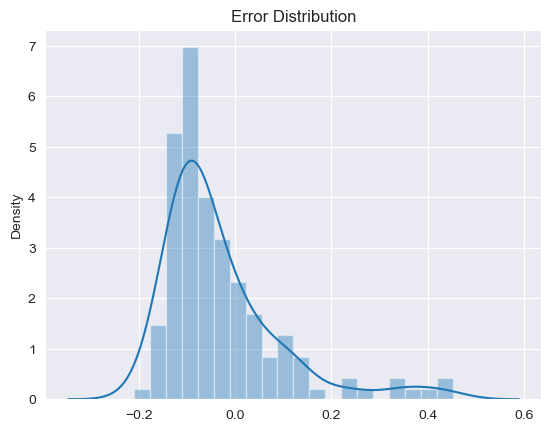

In [54]:
sns.distplot((y_train - y_train_price), bins=20)
plt.title('Error Distribution')
plt.show()

The residuals are normally distributed and somewhat centered around 0.

### Predict

In [55]:
scale_vars = [
    "price",
    "wheelbase",
    "carlength",
    "carwidth",
    "carheight",
    "curbweight",
    "enginesize",
    "symboling",
    "doornumber",
    "cylindernumber",
    "boreratio",
    "stroke",
    "compressionratio",
    "horsepower",
    "peakrpm",
    "citympg",
    "highwaympg"
]

df_test[scale_vars] = scaler.fit_transform(df_test[scale_vars])

In [56]:
df_test.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,113.322581,0.583871,0.564516,0.370121,0.486741,0.375212,0.454249,0.371743,0.080645,0.228835,...,0.048387,0.064516,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,59.300782,0.271724,0.499868,0.179970,0.183964,0.208977,0.234487,0.222354,0.220721,0.188416,...,0.216335,0.247676,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67.000000,0.400000,0.000000,0.265306,0.389764,0.221053,0.264423,0.219125,0.000000,0.126638,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,117.500000,0.600000,1.000000,0.327988,0.475591,0.326316,0.485577,0.344065,0.000000,0.183406,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,167.500000,0.800000,1.000000,0.482507,0.642126,0.421053,0.605769,0.540726,0.000000,0.287118,...,0.000000,0.000000,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,202.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
y_test = df_test.pop('price')
X_test = df_test

In [58]:
X_train_lm.columns

Index(['carwidth', 'bmw', 'rear'], dtype='object')

In [59]:
# Creating X_test_lm dataframe by dropping variables from X_test
X_test_lm = X_test[X_train_lm.columns]


Predicting using model

In [60]:
y_pred = lm.predict(X_test_lm)

In [61]:
round(r2_score(y_test, y_pred),2)

0.73

R2 Score is around 0.73, which is not a great score as compare to training which was 0.83 

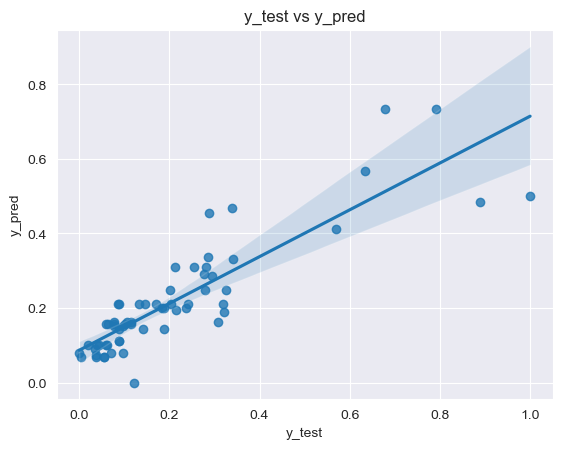

In [64]:
sns.regplot(x=y_test, y=y_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

Finally,

`price_of_car = 0.5010*carwidth + 0.3346*bmw + 0.6025*rear`

where,
- carwidth is Width of car
- bmw is car company
- rear is engine location